# Proyecto Deep Learning – CNN (Visión por computador)

En este notebook uso una **Convolutional Neural Network (CNN)** para clasificar
imágenes de ropa del dataset **Fashion-MNIST**.

Cada imagen es de 28x28 en escala de grises y pertenece a una de 10 clases
(zapatos, camisetas, pantalones, etc.). El objetivo es entrenar una CNN sencilla
y evaluar qué tan bien reconoce las prendas.


## Importar librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import tensorflow as tf
from tensorflow.keras import datasets, models, layers


## Cargar dataset y EDA básica

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


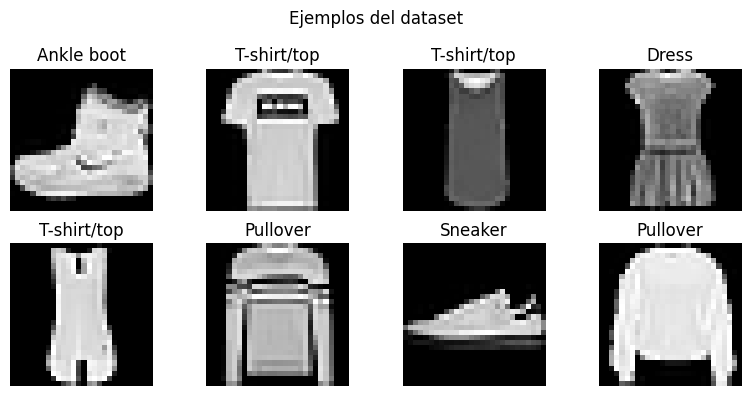

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = datasets.fashion_mnist.load_data()

x_train_full.shape, y_train_full.shape, x_test.shape, y_test.shape

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

unique, counts = np.unique(y_train_full, return_counts=True)
dict(zip([class_names[i] for i in unique], counts))

plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train_full[i], cmap="gray")
    plt.title(class_names[y_train_full[i]])
    plt.axis("off")
plt.suptitle("Ejemplos del dataset")
plt.tight_layout()
plt.show()

## Preprocesamiento

In [3]:
x_train = x_train_full[:50000]
y_train = y_train_full[:50000]

x_val = x_train_full[50000:]
y_val = y_train_full[50000:]

x_test = x_test
y_test = y_test

x_train.shape, x_val.shape, x_test.shape

x_train = x_train.astype("float32") / 255.0
x_val   = x_val.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

x_train = np.expand_dims(x_train, -1)
x_val   = np.expand_dims(x_val, -1)
x_test  = np.expand_dims(x_test, -1)

x_train.shape

(50000, 28, 28, 1)

## Definir la CNN

In [4]:
tf.random.set_seed(42)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Compilar y entrenar

In [5]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=12,
    batch_size=64,
    verbose=1
)

Epoch 1/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 61ms/step - accuracy: 0.7324 - loss: 0.7361 - val_accuracy: 0.8655 - val_loss: 0.3780
Epoch 2/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 78ms/step - accuracy: 0.8703 - loss: 0.3577 - val_accuracy: 0.8790 - val_loss: 0.3335
Epoch 3/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 55ms/step - accuracy: 0.8868 - loss: 0.3088 - val_accuracy: 0.8869 - val_loss: 0.3123
Epoch 4/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 58ms/step - accuracy: 0.8989 - loss: 0.2743 - val_accuracy: 0.8956 - val_loss: 0.2923
Epoch 5/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.9108 - loss: 0.2474 - val_accuracy: 0.8956 - val_loss: 0.2897
Epoch 6/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.9181 - loss: 0.2239 - val_accuracy: 0.9012 - val_loss: 0.2866
Epoch 7/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9257 - loss: 0.2039 - val_accuracy: 0.9002 - val_loss: 0.2892
Epoch 8/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.9329 - loss: 0.1847 - 

## Curvas de loss y accuracy

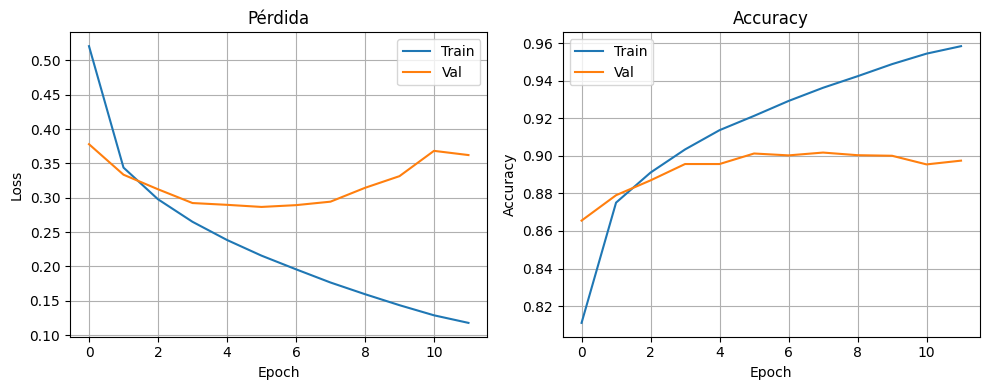

In [6]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Pérdida")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Evaluación en test

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Loss en test: {test_loss:.4f}")
print(f"Accuracy en test: {test_acc:.4f}")

Loss en test: 0.3572
Accuracy en test: 0.8945


## Matriz de confusión y métricas

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


<Figure size 700x700 with 0 Axes>

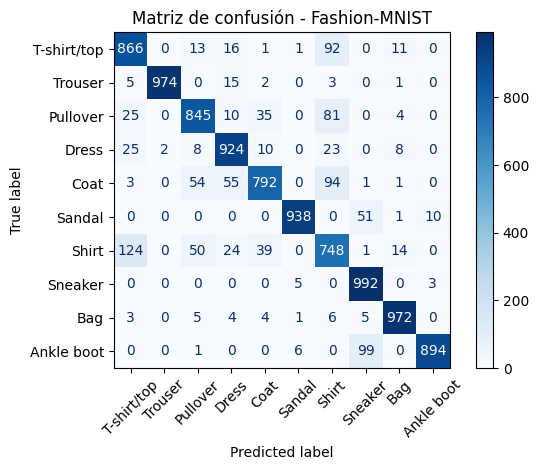

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.87      0.84      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.87      0.84      0.86      1000
       Dress       0.88      0.92      0.90      1000
        Coat       0.90      0.79      0.84      1000
      Sandal       0.99      0.94      0.96      1000
       Shirt       0.71      0.75      0.73      1000
     Sneaker       0.86      0.99      0.92      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.99      0.89      0.94      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [8]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(7,7))
disp.plot(cmap="Blues", xticks_rotation=45, values_format="d")
plt.title("Matriz de confusión - Fashion-MNIST")
plt.tight_layout()
plt.show()

print(classification_report(
    y_test, y_pred,
    target_names=class_names
))

## Ejemplos de predicciones correctas e incorrectas

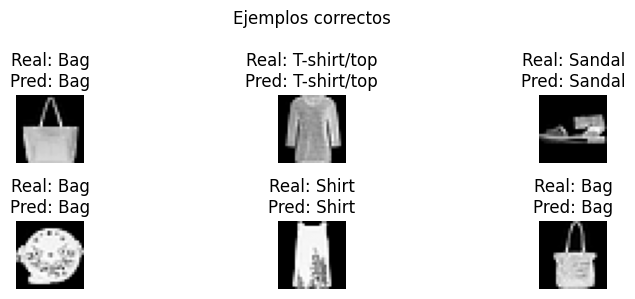

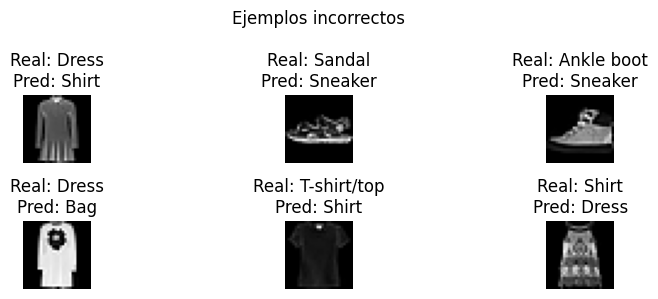

In [9]:
correct_idx = np.where(y_test == y_pred)[0]
incorrect_idx = np.where(y_test != y_pred)[0]

len(correct_idx), len(incorrect_idx)

n = 6
indices = np.random.choice(correct_idx, size=n, replace=False)

plt.figure(figsize=(9,3))
for i, idx in enumerate(indices):
    plt.subplot(2, n//2, i+1)
    plt.imshow(x_test[idx].squeeze(), cmap="gray")
    plt.title(f"Real: {class_names[y_test[idx]]}\nPred: {class_names[y_pred[idx]]}")
    plt.axis("off")
plt.suptitle("Ejemplos correctos")
plt.tight_layout()
plt.show()

n = 6
n = min(n, len(incorrect_idx))
if n > 0:
    indices = np.random.choice(incorrect_idx, size=n, replace=False)

    plt.figure(figsize=(9,3))
    for i, idx in enumerate(indices):
        plt.subplot(2, n//2, i+1)
        plt.imshow(x_test[idx].squeeze(), cmap="gray")
        plt.title(f"Real: {class_names[y_test[idx]]}\nPred: {class_names[y_pred[idx]]}")
        plt.axis("off")
    plt.suptitle("Ejemplos incorrectos")
    plt.tight_layout()
    plt.show()
else:
    print("No hubo predicciones incorrectas en la muestra.")